In [1]:
import sys
sys.path.append("../src/data") 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from feature_builder import FeatureBuilder

In [3]:
data = FeatureBuilder("../data/raw/student_survey_responses.csv", normalize=False, exclude_columns=None).build_features()

d:\Personal Projects\311-ML-Food-Prediction\notebooks\../src/data\feature_builder.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.df = self.df.applymap(lambda x: x.lower())


In [4]:
print(data.columns)

Index(['id', 'label', 'q1_processed', 'q2_ingredient_count', 'q2_pizza_prob',
       'q2_shawarma_prob', 'q2_sushi_prob', 'q3_week_day_lunch',
       'q3_week_day_dinner', 'q3_weekend_lunch', 'q3_weekend_dinner',
       'q3_at_a_party', 'q3_late_night_snack', 'q4_processed', 'q5_pizza_prob',
       'q5_shawarma_prob', 'q5_sushi_prob', 'q6_pizza_prob',
       'q6_shawarma_prob', 'q6_sushi_prob', 'q7_parents', 'q7_siblings',
       'q7_friends', 'q7_teachers', 'q7_strangers', 'q8_processed',
       'q1_times_q2', 'q1_times_q4', 'q4_divided_by_q1', 'q2_times_q4',
       'q2_divided_by_q4', 'q4_divided_by_q2', 'q8_divided_by_q2',
       'q8_divided_by_q4'],
      dtype='object')


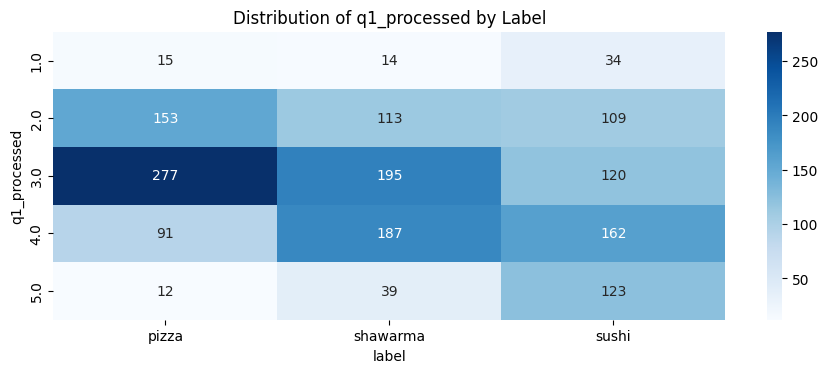

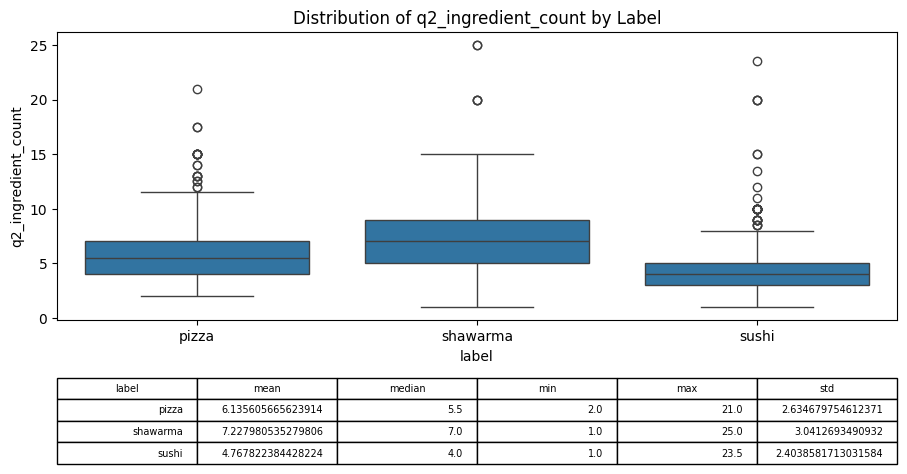

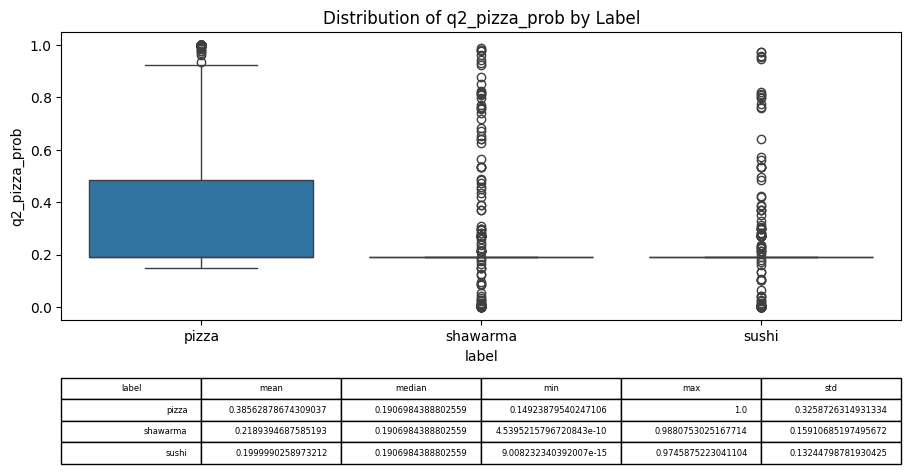

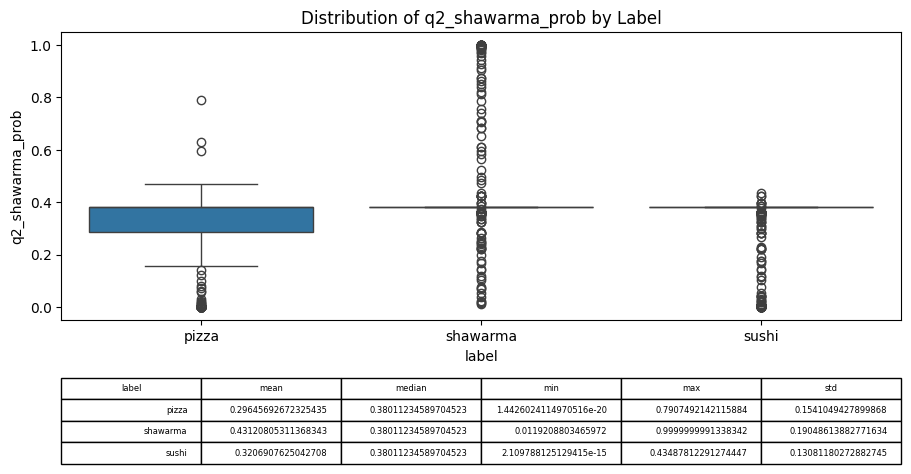

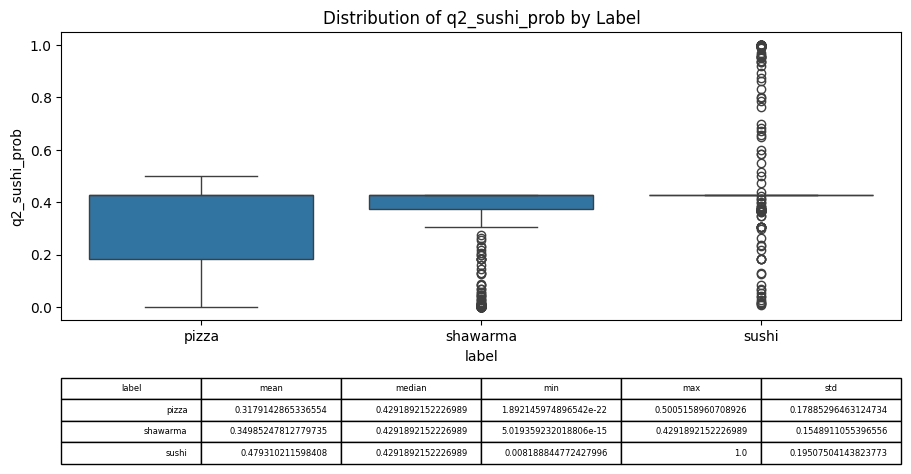

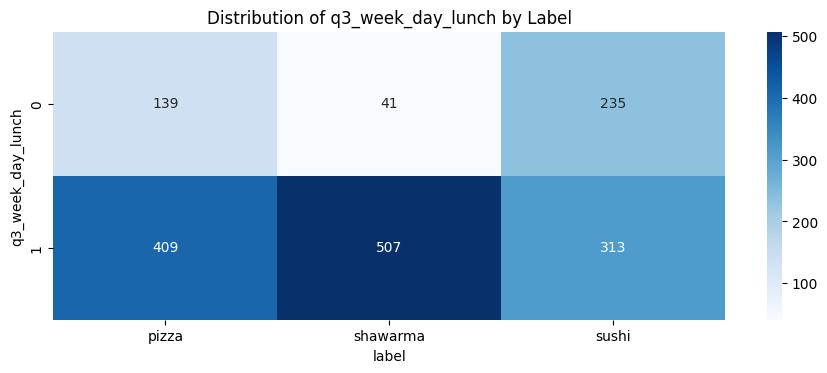

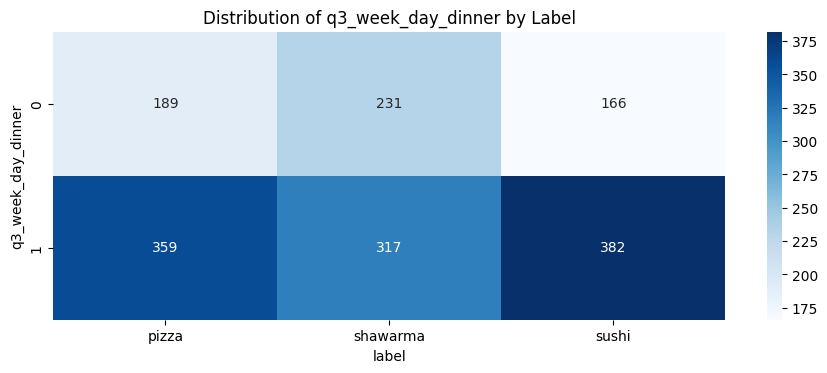

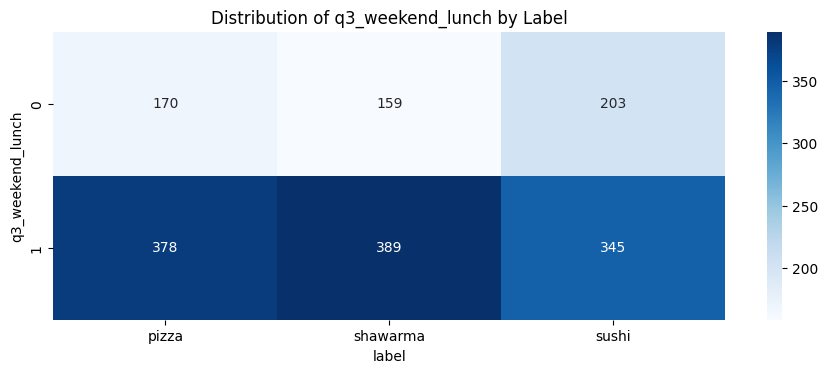

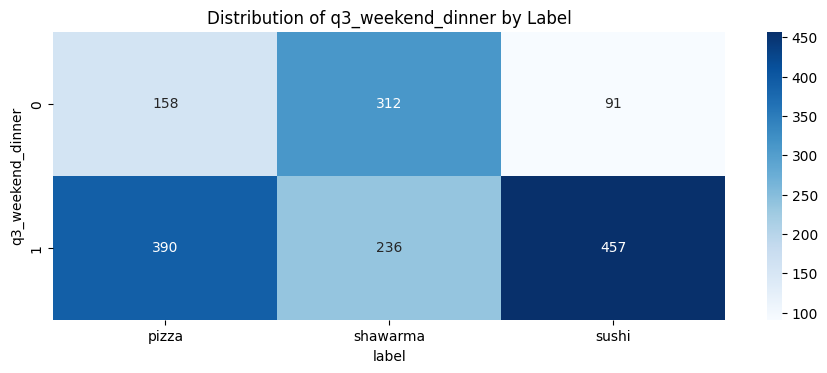

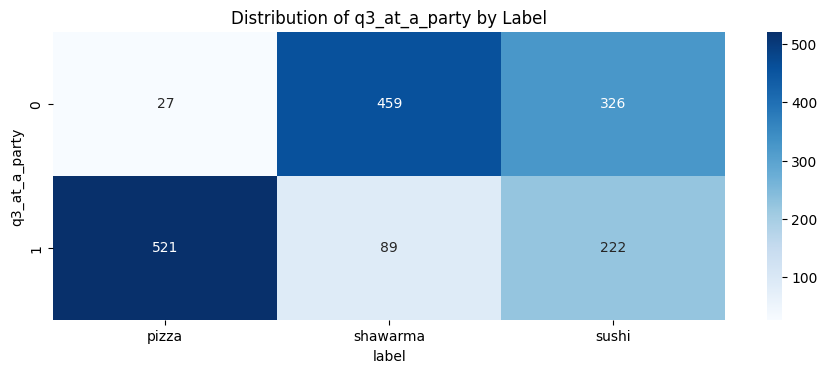

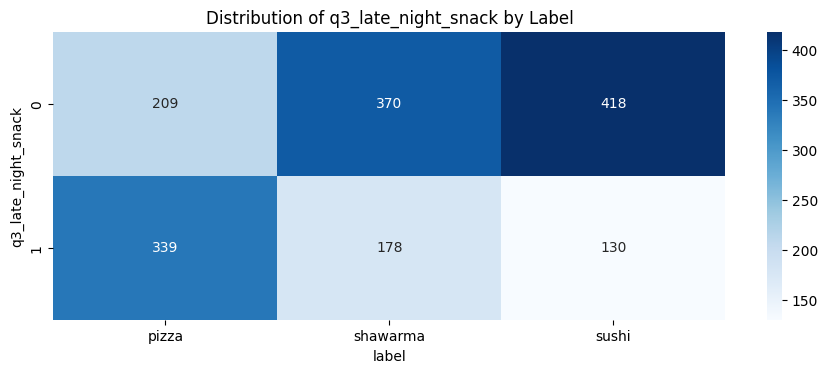

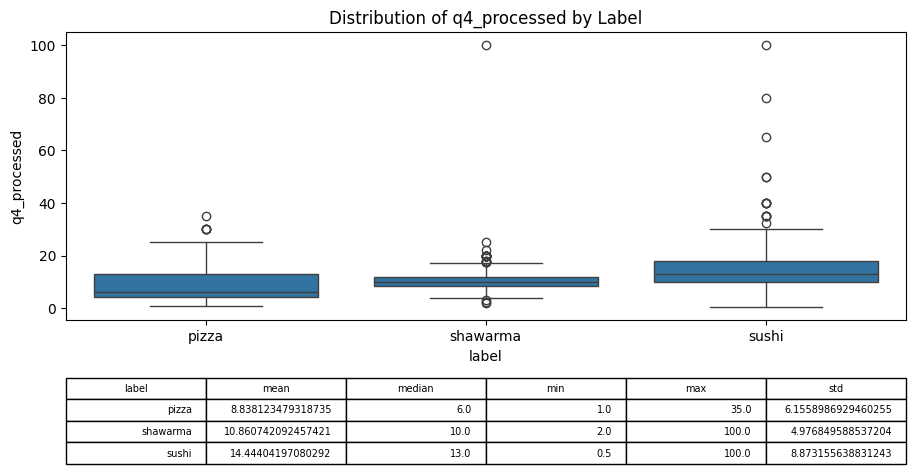

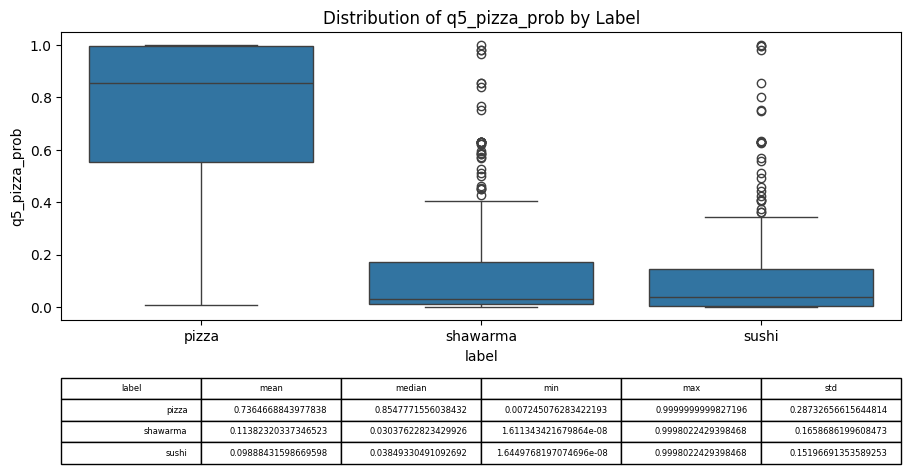

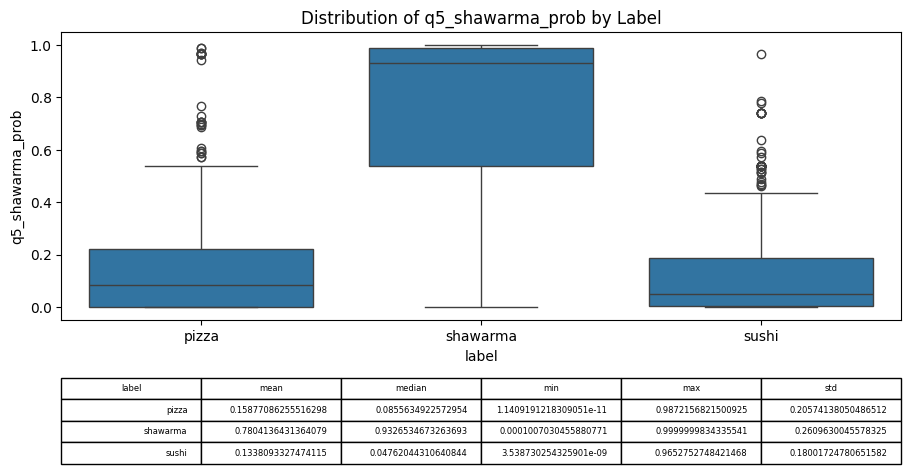

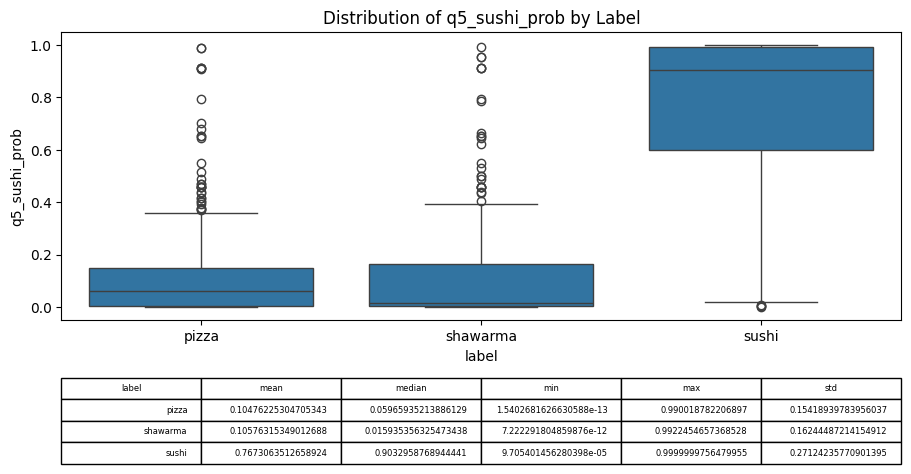

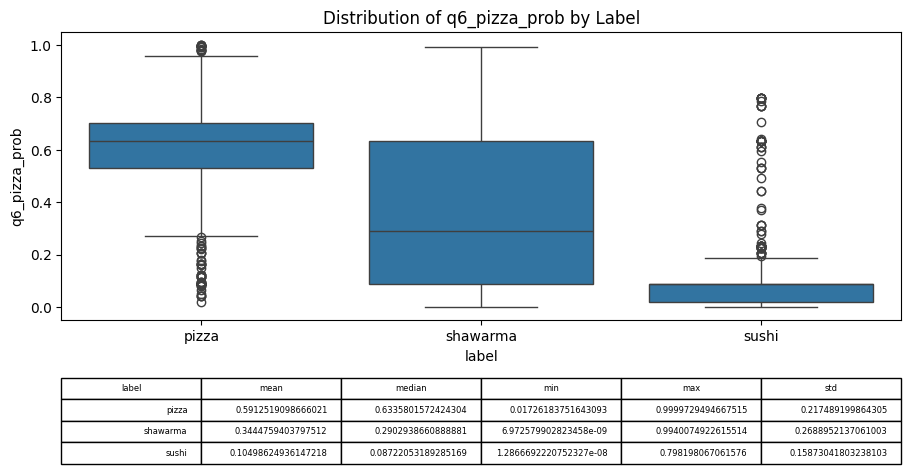

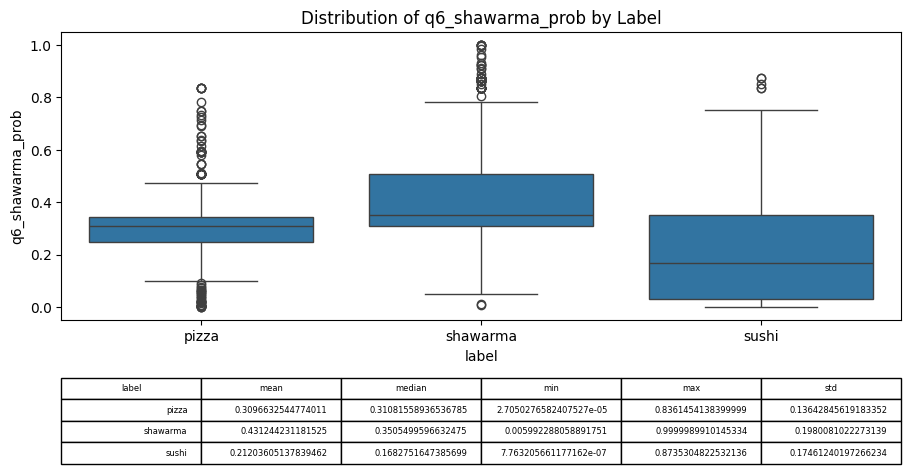

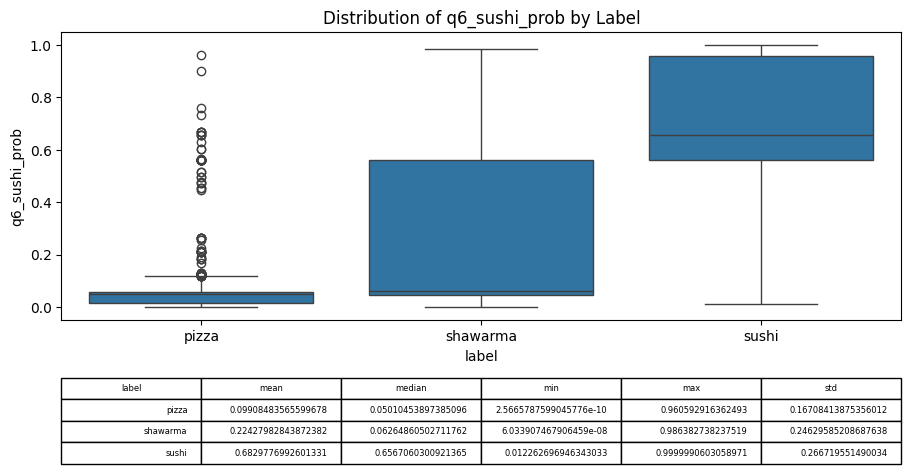

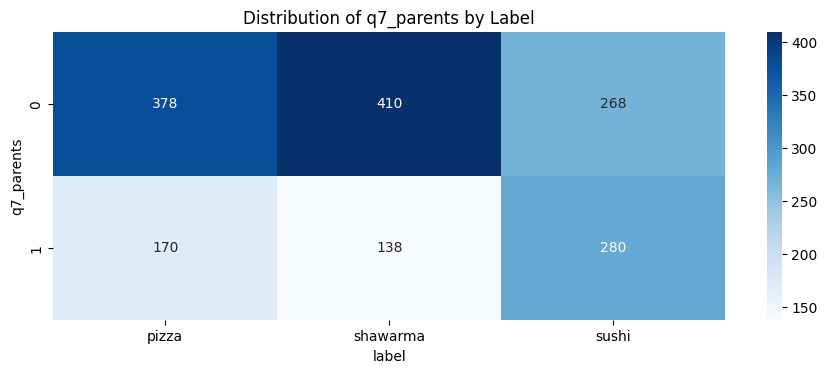

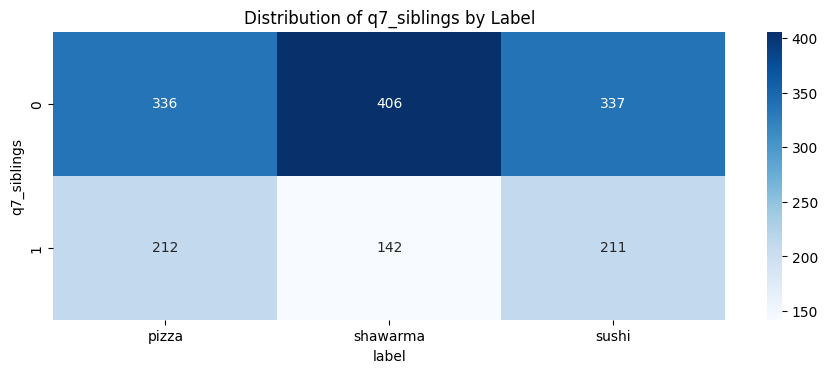

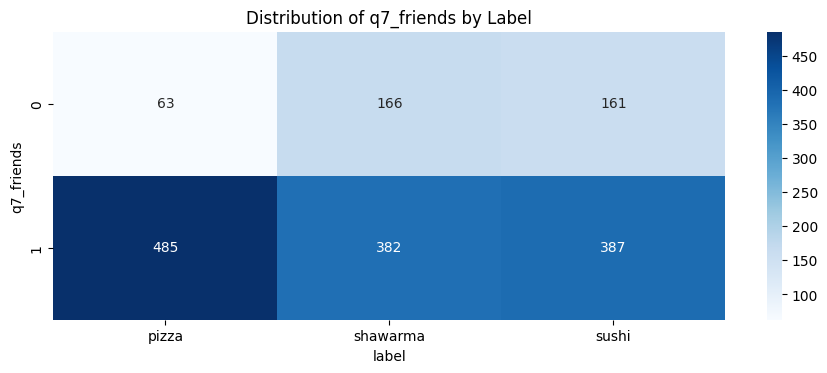

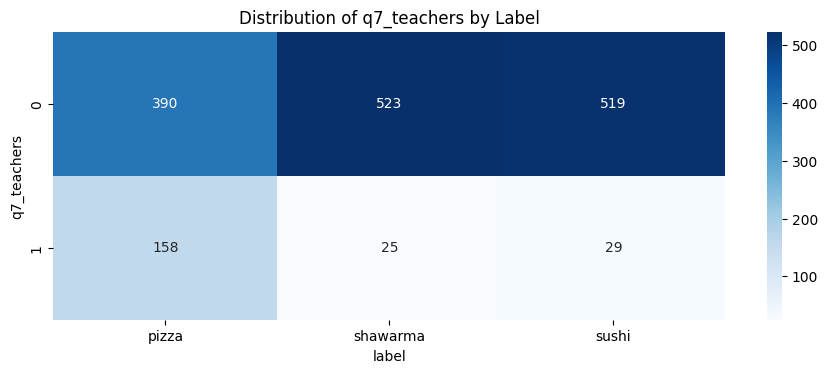

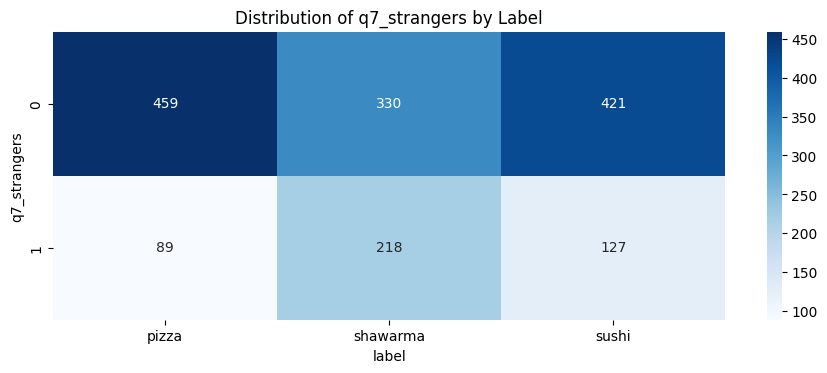

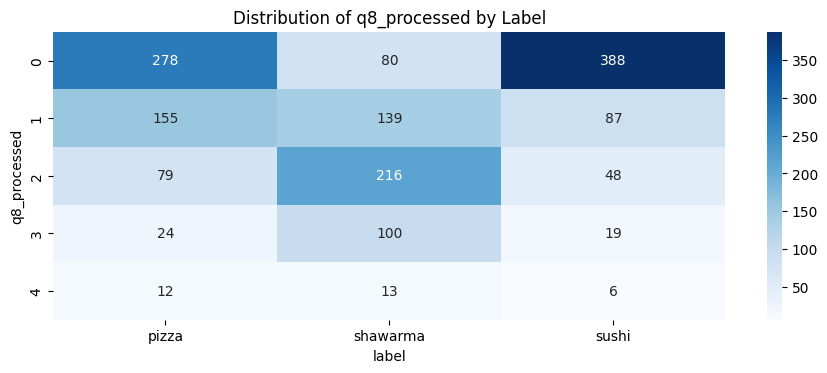

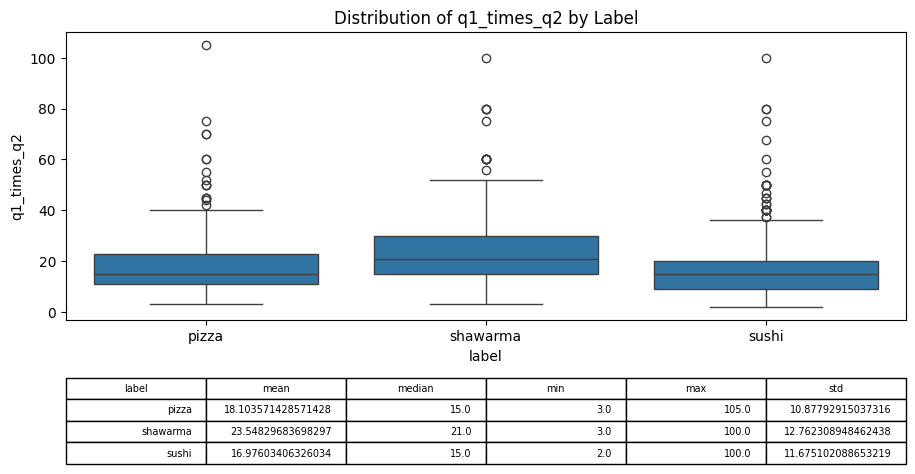

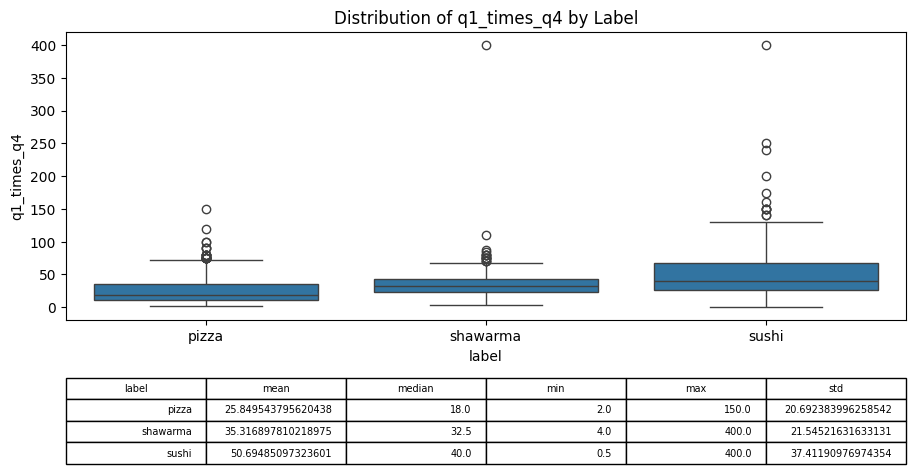

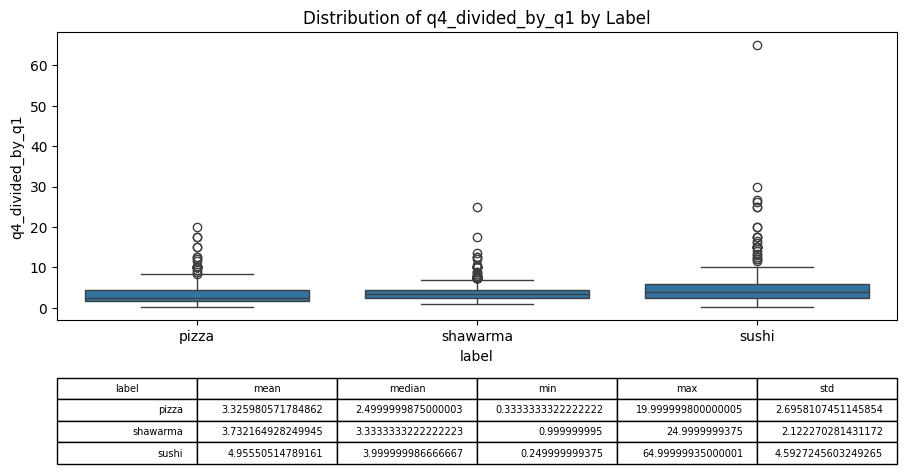

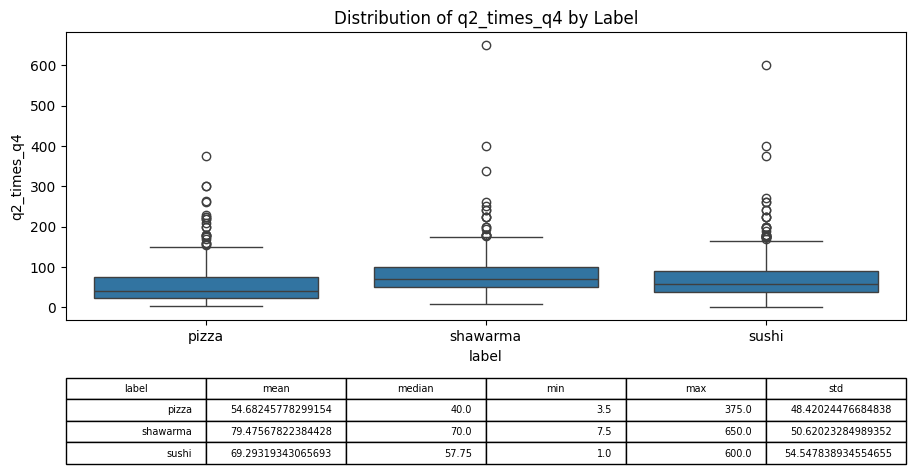

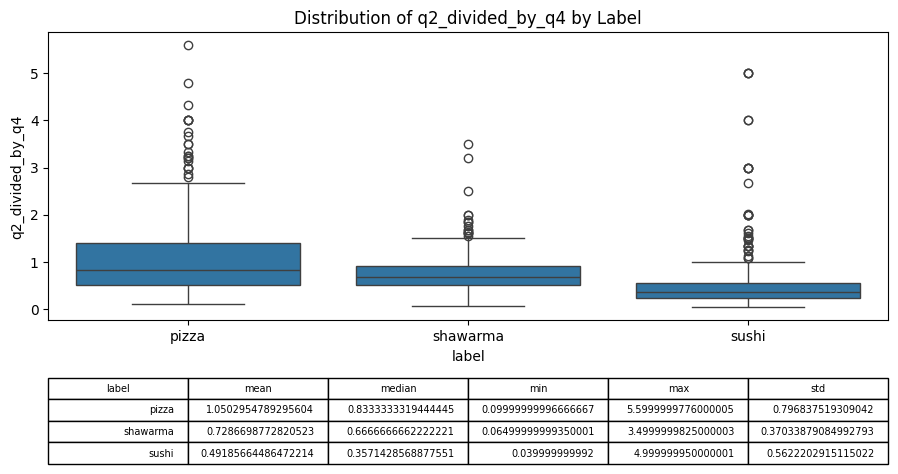

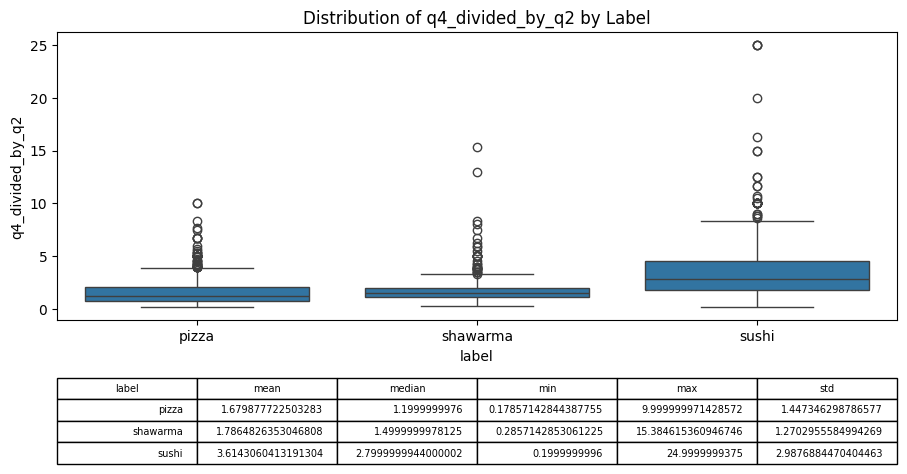

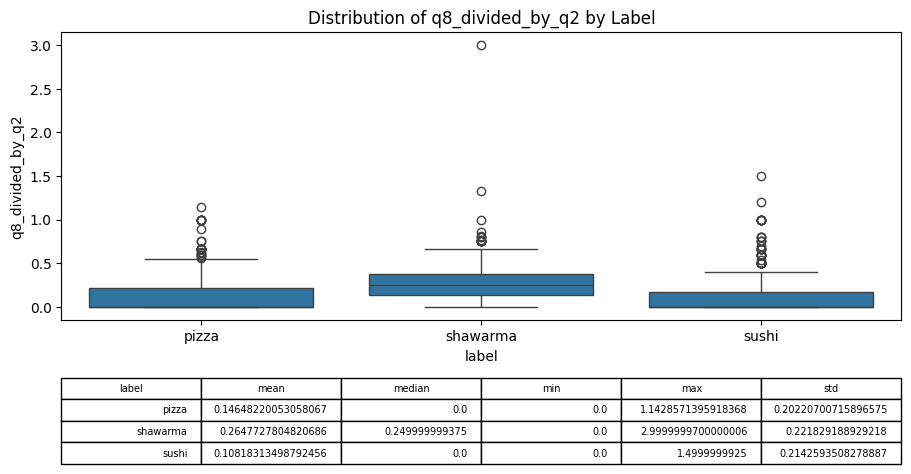

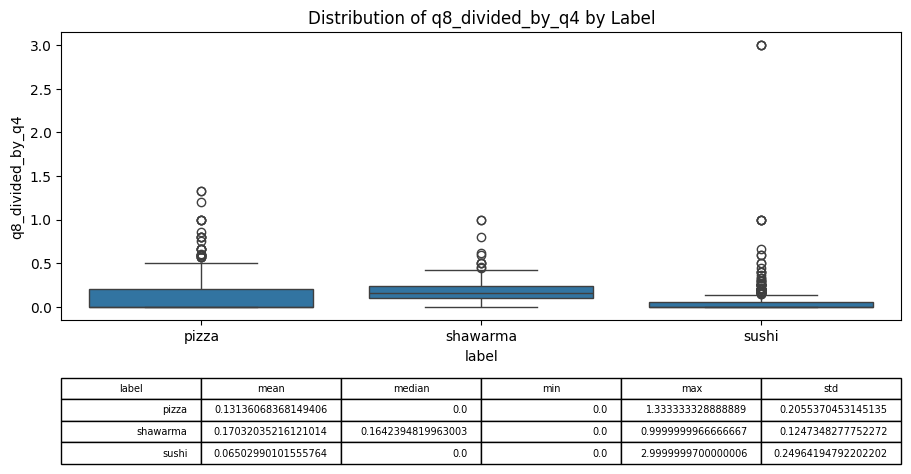

In [8]:
categorical_columns = ["q3_week_day_lunch", "q3_week_day_dinner", "q3_weekend_lunch", "q3_weekend_dinner", "q3_at_a_party", "q3_late_night_snack",
                       "q7_parents", "q7_siblings", "q7_friends", "q7_teachers", "q7_strangers",
                       "q1_processed", "q8_processed"]

# Loop through each feature and create visualizations
for feature in data.columns:
    if feature == 'id' or feature == 'label':
        continue

    plt.figure(figsize=(12, 6))

    # Categorical features
    if feature in categorical_columns:
        # sns.countplot(data=data, x=feature, hue='label')

        cross_tab = pd.crosstab(data[feature], data['label'])
        sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Distribution of {feature} by Label')
    else:  # Numerical features
        sns.boxplot(data=data, x='label', y=feature)
        # sns.violinplot(data=data, x='label', y=feature)
        # sns.histplot(data=data, x=feature, hue='label', kde=True, multiple='stack')
        plt.title(f'Distribution of {feature} by Label')

        # Calculate summary statistics
        summary_stats = data.groupby('label')[feature].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
        # Display summary statistics as a table below the plot
        plt.table(cellText=summary_stats.values,
                colLabels=summary_stats.columns,
                loc='bottom',
                bbox=[0, -0.5, 1, 0.3])  # Adjust bbox for positioning

    plt.subplots_adjust(left=0.2, bottom=0.4)  # Adjust layout to make room for the table
    plt.show()

In [9]:
data.head()

,id,label,q1_processed,q2_ingredient_count,q2_pizza_prob,q2_shawarma_prob,q2_sushi_prob,q3_week_day_lunch,q3_week_day_dinner,q3_weekend_lunch,...,q7_strangers,q8_processed,q1_times_q2,q1_times_q4,q4_divided_by_q1,q2_times_q4,q2_divided_by_q4,q4_divided_by_q2,q8_divided_by_q2,q8_divided_by_q4
0,716549,pizza,3.0,6.0,0.190698,0.380112,0.429189,1,0,0,...,0,1,18.0,15.0,1.666667,30.0,1.200000,0.833333,0.166667,0.200000
1,715742,pizza,4.0,2.0,0.330908,0.627972,0.041119,1,0,0,...,1,0,8.0,20.0,1.250000,10.0,0.400000,2.500000,0.000000,0.000000
2,727333,pizza,3.0,5.0,0.190698,0.380112,0.429189,1,1,1,...,0,2,15.0,30.0,3.333333,50.0,0.500000,2.000000,0.400000,0.200000
3,606874,pizza,4.0,6.5,0.190698,0.380112,0.429189,1,1,1,...,0,4,26.0,12.0,0.750000,19.5,2.166667,0.461538,0.615385,1.333333
4,505318,pizza,2.0,3.0,0.484802,0.285416,0.229782,1,1,1,...,0,1,6.0,10.0,2.500000,15.0,0.600000,1.666667,0.333333,0.200000
